# Factors affecting loan completion and the impact on borrower benefit retrun

## Investigation Overview

In this investigation, I visualized some columns to check for their possible contribution on loan completion success and the impact on the overall loan's borrower retrun.

## Dataset Overview

The data consisted of 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from jupyterthemes import jtplot

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('prosperLoanData.csv', encoding='iso-8859-1',low_memory=False)

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## What is/are the main feature(s) of interest in your dataset?

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In [4]:
df_new=df[['LoanStatus','BorrowerAPR','BorrowerRate','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','Occupation',
'EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CurrentlyInGroup','BankcardUtilization','AvailableBankcardCredit',
'IncomeRange','StatedMonthlyIncome','LoanMonthsSinceOrigination']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanStatus                  113937 non-null  object 
 1   BorrowerAPR                 113912 non-null  float64
 2   BorrowerRate                113937 non-null  float64
 3   EstimatedEffectiveYield     84853 non-null   float64
 4   EstimatedLoss               84853 non-null   float64
 5   EstimatedReturn             84853 non-null   float64
 6   Occupation                  110349 non-null  object 
 7   EmploymentStatus            111682 non-null  object 
 8   EmploymentStatusDuration    106312 non-null  float64
 9   IsBorrowerHomeowner         113937 non-null  bool   
 10  CurrentlyInGroup            113937 non-null  bool   
 11  BankcardUtilization         106333 non-null  float64
 12  AvailableBankcardCredit     106393 non-null  float64
 13  IncomeRange   

In [5]:
null_values=[df_new[['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn']].isnull().sum()]
null_values

[EstimatedEffectiveYield    29084
 EstimatedLoss              29084
 EstimatedReturn            29084
 dtype: int64]

In [6]:
df_clean=df_new.dropna(subset=['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn'])
df_clean.info()
           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LoanStatus                  84853 non-null  object 
 1   BorrowerAPR                 84853 non-null  float64
 2   BorrowerRate                84853 non-null  float64
 3   EstimatedEffectiveYield     84853 non-null  float64
 4   EstimatedLoss               84853 non-null  float64
 5   EstimatedReturn             84853 non-null  float64
 6   Occupation                  83520 non-null  object 
 7   EmploymentStatus            84853 non-null  object 
 8   EmploymentStatusDuration    84834 non-null  float64
 9   IsBorrowerHomeowner         84853 non-null  bool   
 10  CurrentlyInGroup            84853 non-null  bool   
 11  BankcardUtilization         84853 non-null  float64
 12  AvailableBankcardCredit     84853 non-null  float64
 13  IncomeRange                 84

In [7]:
df_clean.head(20)

,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,BankcardUtilization,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,LoanMonthsSinceOrigination
1,Current,0.12016,0.0920,0.07960,0.0249,0.05470,Professional,Employed,44.0,False,False,0.21,10266.0,"$50,000-74,999",6125.000000,0
3,Current,0.12528,0.0974,0.08490,0.0249,0.06000,Skilled Labor,Employed,113.0,True,False,0.04,30754.0,"$25,000-49,999",2875.000000,16
4,Current,0.24614,0.2085,0.18316,0.0925,0.09066,Executive,Employed,44.0,True,False,0.81,695.0,"$100,000+",9583.333333,6
5,Current,0.15425,0.1314,0.11567,0.0449,0.07077,Professional,Employed,82.0,True,False,0.39,86509.0,"$100,000+",8333.333333,3
6,Current,0.31032,0.2712,0.23820,0.1275,0.11070,Sales - Retail,Employed,172.0,False,False,0.72,1929.0,"$25,000-49,999",2083.333333,11
7,Current,0.23939,0.2019,0.17830,0.0799,0.09840,Laborer,Employed,103.0,False,False,0.13,2181.0,"$25,000-49,999",3355.750000,10
8,Current,0.07620,0.0629,0.05221,0.0099,0.04231,Food Service,Employed,269.0,True,False,0.11,77696.0,"$25,000-49,999",3333.333333,3
9,Current,0.07620,0.0629,0.05221,0.0099,0.04231,Food Service,Employed,269.0,True,False,0.11,77696.0,"$25,000-49,999",3333.333333,3
10,Current,0.27462,0.2489,0.23320,0.0890,0.14420,Fireman,Employed,300.0,False,False,0.51,363.0,"$75,000-99,999",7500.000000,22
12,Past Due (1-15 days),0.17969,0.1435,0.12640,0.0524,0.07400,Sales - Retail,Employed,1.0,False,False,0.70,3626.0,"$25,000-49,999",2416.666667,2


In [8]:
col=['LoanStatus','Occupation','EmploymentStatus','IncomeRange']

for x in col:
    val=df_clean[x].value_counts()
    print(x,':\n',val)




LoanStatus :
 Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64
Occupation :
 Other                          21317
Professional                   10542
Executive                       3468
Computer Programmer             3236
Teacher                         2888
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 67, dtype: int64
EmploymentStatus :
 Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Reti

In [9]:
df_clean['LoanStatus'] = df_clean['LoanStatus'].apply(lambda x: x.replace('Past Due','Past_Due'))
df_clean['LoanStatus_cat'] = df_clean['LoanStatus'].apply(lambda x:x.split()[0])
df_clean['LoanStatus_cat'].value_counts()


Current                   56576
Completed                 19664
Chargedoff                 5336
Past_Due                   2067
Defaulted                  1005
FinalPaymentInProgress      205
Name: LoanStatus_cat, dtype: int64

In [10]:
df_clean['Occupation'] = df_clean['Occupation'].astype("str")
df_clean['Occupation'] = df_clean['Occupation'].apply(lambda x:x.strip())
df_clean['Occupation'].describe()


count     84853
unique       68
top       Other
freq      21317
Name: Occupation, dtype: object

In [11]:
df_clean['Occupation'] = df_clean['Occupation'].apply(lambda x: x.replace('<NA>','Not_mentioned'))

In [12]:
df_clean['Occupation_cat'] = df_clean['Occupation'].apply(lambda x:x.split()[0])

100*(df_clean['Occupation_cat'].value_counts(normalize=True)).head(20)


Other             25.122270
Professional      12.423839
Sales              5.160690
Executive          4.087068
Computer           3.813654
Teacher            3.403533
Analyst            3.223221
Administrative     3.191402
Nurse              3.034660
Accountant/CPA     3.033481
Engineer           2.605683
Skilled            2.569149
Clerical           2.493724
Retail             2.358196
Food               2.170813
Truck              1.609843
Tradesman          1.580380
nan                1.570952
Construction       1.562703
Police             1.504956
Name: Occupation_cat, dtype: float64

In [13]:
# changing object column to categories
categ_dict = {'LoanStatus': df_clean['LoanStatus'].unique().tolist(),'Occupation':df_clean['Occupation'].unique().tolist(),
    'LoanStatus_cat': df_clean['LoanStatus_cat'].unique().tolist(),'Occupation_cat':df_clean['Occupation_cat'].unique().tolist(),
              'EmploymentStatus':df_clean['EmploymentStatus'].unique().tolist(),'IncomeRange':df_clean['IncomeRange'].unique().tolist()}

for var in categ_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = categ_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [14]:
df_clean.head()

,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,BankcardUtilization,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanStatus_cat,Occupation_cat
1,Current,0.12016,0.0920,0.07960,0.0249,0.05470,Professional,Employed,44.0,False,False,0.21,10266.0,"$50,000-74,999",6125.000000,0,Current,Professional
3,Current,0.12528,0.0974,0.08490,0.0249,0.06000,Skilled Labor,Employed,113.0,True,False,0.04,30754.0,"$25,000-49,999",2875.000000,16,Current,Skilled
4,Current,0.24614,0.2085,0.18316,0.0925,0.09066,Executive,Employed,44.0,True,False,0.81,695.0,"$100,000+",9583.333333,6,Current,Executive
5,Current,0.15425,0.1314,0.11567,0.0449,0.07077,Professional,Employed,82.0,True,False,0.39,86509.0,"$100,000+",8333.333333,3,Current,Professional
6,Current,0.31032,0.2712,0.23820,0.1275,0.11070,Sales - Retail,Employed,172.0,False,False,0.72,1929.0,"$25,000-49,999",2083.333333,11,Current,Sales


# Categorical Univariate analysis

### Absolute frequency

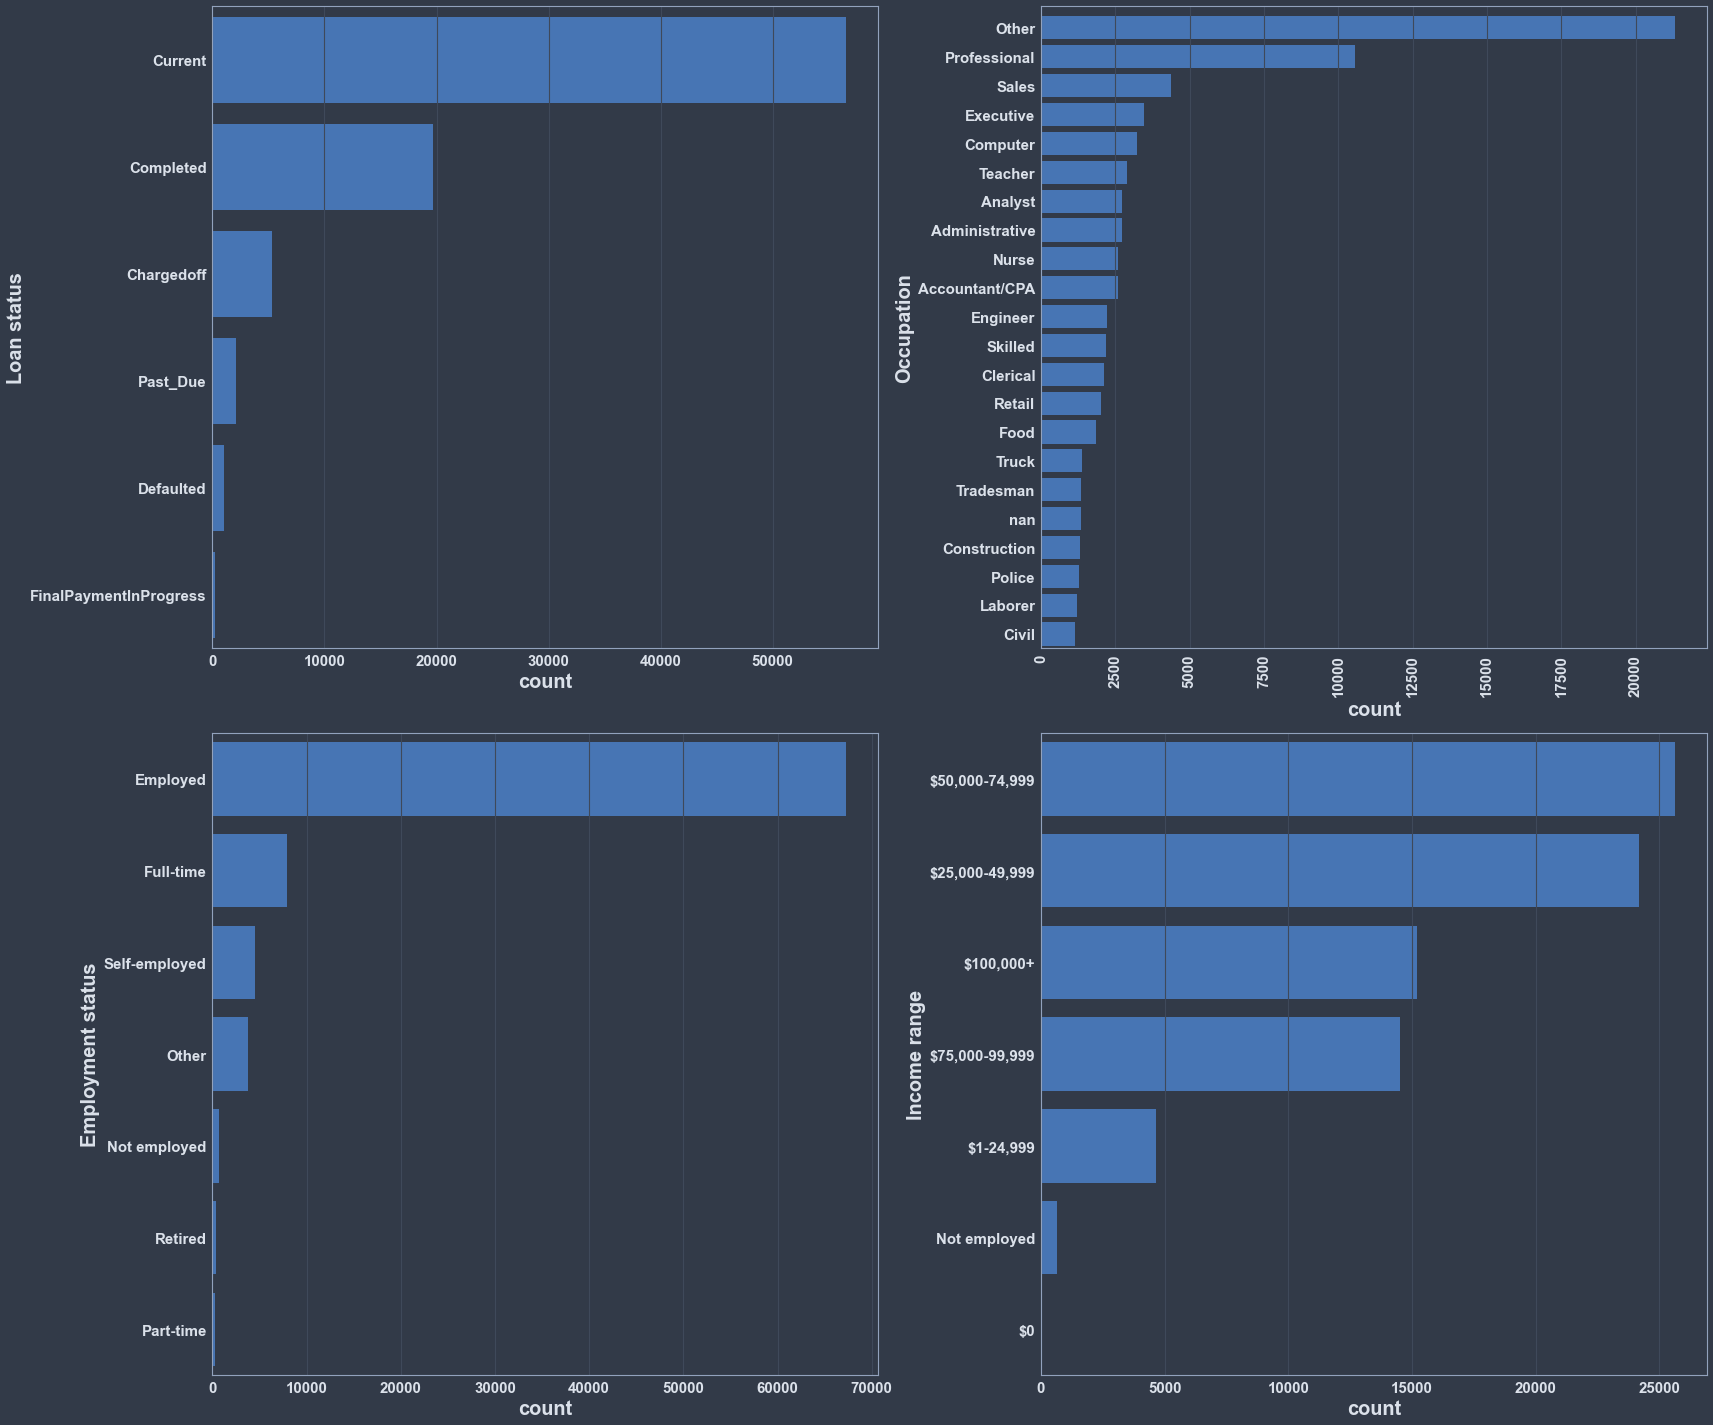

In [15]:
jtplot.style()
base_color = sb.color_palette()[0]
l_order = df_clean.LoanStatus_cat.value_counts().index
o_order = df_clean.Occupation_cat.value_counts().index
e_order = df_clean.EmploymentStatus.value_counts().index
i_order = df_clean.IncomeRange.value_counts().index
plt.figure(figsize=[24,20])

#fig, ax = plt.subplots(nrows=4, figsize = [10,10])
plt.subplot(2,2,1)
sb.countplot(data = df_clean, y= 'LoanStatus_cat', color = base_color,order = l_order);
plt.xticks( weight = 'bold',size = 15) 
plt.yticks( weight = 'bold',size = 15)
plt.xlabel('count',weight = 'bold',size=20)
plt.ylabel('Loan status',weight = 'bold',size=20) 

plt.subplot(2,2,2)
sb.countplot(data = df_clean, y = 'Occupation_cat', color = base_color,order = o_order);
plt.xticks(rotation=90)
plt.ylim(21.5,-0.75)
plt.xticks( weight = 'bold',size = 15) 
plt.yticks( weight = 'bold',size = 15)
plt.xlabel('count',weight = 'bold',size=20)
plt.ylabel('Occupation',weight = 'bold',size=20) 

plt.subplot(2,2,3)
sb.countplot(data = df_clean, y = 'EmploymentStatus', color = base_color,order = e_order);
plt.xticks( weight = 'bold',size = 15) 
plt.yticks( weight = 'bold',size = 15)
plt.xlabel('count',weight = 'bold',size=20)
plt.ylabel('Employment status',weight = 'bold',size=20)

plt.subplot(2,2,4)
sb.countplot(data = df_clean, y = 'IncomeRange', color = base_color,order= i_order);
plt.xticks( weight = 'bold',size = 15) 
plt.yticks( weight = 'bold',size = 15)
plt.xlabel('count',weight = 'bold',size=20)
plt.ylabel('Income range',weight = 'bold',size=20);plt.tight_layout()

plt.tight_layout()


### Relative frequency

In [16]:
rel_loan = df_clean['LoanStatus_cat'].value_counts(normalize=True).reset_index()
rel_loan['LoanStatus_cat'] = 100*rel_loan['LoanStatus_cat']

rel_occ = df_clean['Occupation_cat'].value_counts(normalize=True).reset_index()
rel_occ['Occupation_cat'] = 100*rel_occ['Occupation_cat']

rel_emp = df_clean['EmploymentStatus'].value_counts(normalize=True).reset_index()
rel_emp['EmploymentStatus'] = 100*rel_emp['EmploymentStatus']

rel_income = df_clean['IncomeRange'].value_counts(normalize=True).reset_index()
rel_income['IncomeRange'] = 100*rel_income['IncomeRange']

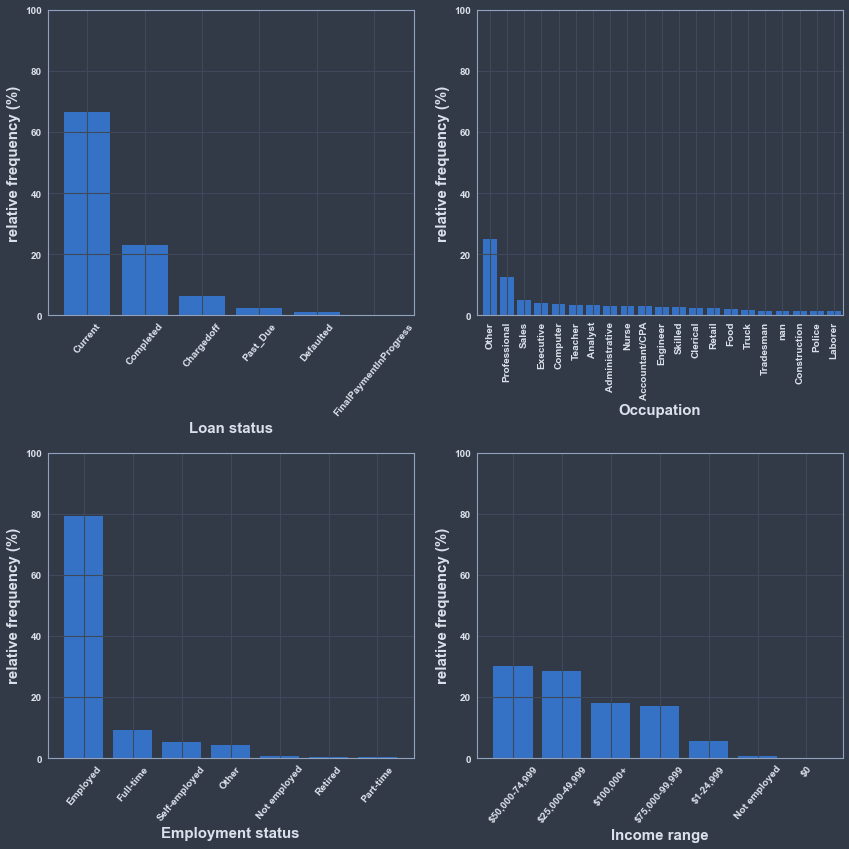

In [17]:
base_color = sb.color_palette()[0]
fig, axs = plt.subplots(nrows=2, figsize = [12,12])

plt.subplot(2,2,1)
x = rel_loan['index'].tolist()
y = rel_loan['LoanStatus_cat']
plt.bar(x,y)
plt.xticks(weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('Loan status',weight = 'bold',size=15)
plt.ylabel('relative frequency (%)',weight = 'bold',size=15) 
plt.xticks(rotation=50)
plt.ylim(0,100)

plt.subplot(2,2,2)
x = rel_occ['index'].tolist()
y = rel_occ['Occupation_cat']
plt.bar(x,y)
plt.xticks(weight = 'bold',size = 10) 
plt.yticks(weight = 'bold',size = 10)
plt.xlabel('Occupation',weight = 'bold',size=15)
plt.ylabel('relative frequency (%)',weight = 'bold',size=15) 
plt.xticks(rotation=90)
plt.xlim(-0.75,20.5)
plt.ylim(0,100)

plt.subplot(2,2,3)
x = rel_emp['index']
y = rel_emp['EmploymentStatus']
plt.bar(x,y)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('Employment status',weight = 'bold',size=15)
plt.ylabel('relative frequency (%)',weight = 'bold',size=15) 
plt.xticks(rotation=50)
plt.ylim(0,100)

plt.subplot(2,2,4)
x = rel_income['index']
y = rel_income['IncomeRange']
plt.bar(x,y)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('Income range',weight = 'bold',size=15)
plt.ylabel('relative frequency (%)',weight = 'bold',size=15) 
plt.xticks(rotation=50)
plt.ylim(0,100)

plt.tight_layout()


# Univariate Numerical

In [18]:
df_clean_num = df_clean[['LoanStatus_cat','BorrowerAPR','BorrowerRate','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn',
'EmploymentStatusDuration','BankcardUtilization','AvailableBankcardCredit','StatedMonthlyIncome','LoanMonthsSinceOrigination']]


In [19]:
df_clean_num.describe()

,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,EmploymentStatusDuration,BankcardUtilization,AvailableBankcardCredit,StatedMonthlyIncome,LoanMonthsSinceOrigination
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84834.000000,84853.000000,84853.000000,8.485300e+04,84853.000000
mean,0.226658,0.196022,0.168661,0.080306,0.096068,103.055320,0.564219,11400.695355,5.931175e+03,16.023452
std,0.079916,0.074631,0.068467,0.046764,0.030403,97.078884,0.301713,18610.424333,8.239944e+03,13.897523
min,0.045830,0.040000,-0.182700,0.004900,-0.182700,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.163280,0.135900,0.115670,0.042400,0.074080,30.000000,0.330000,1148.000000,3.434000e+03,4.000000
50%,0.219450,0.187500,0.161500,0.072400,0.091700,74.000000,0.600000,4574.000000,5.000000e+03,11.000000
75%,0.292540,0.257400,0.224300,0.112000,0.116600,148.000000,0.830000,13910.000000,7.083333e+03,25.000000
max,0.423950,0.360000,0.319900,0.366000,0.283700,755.000000,2.500000,498374.000000,1.750003e+06,56.000000


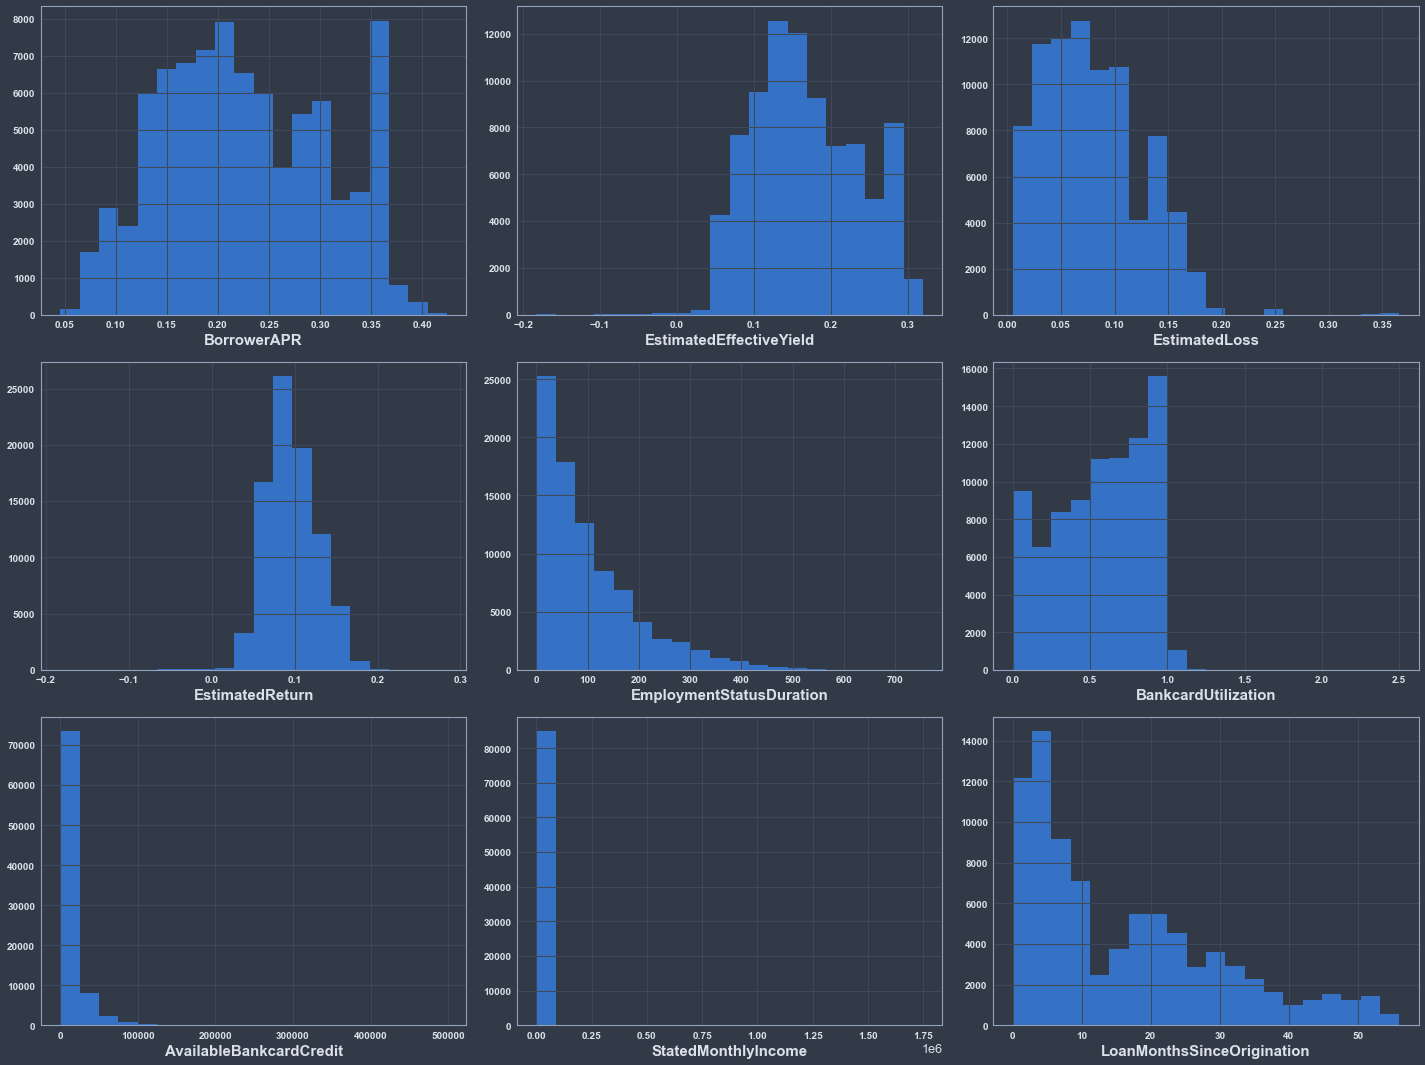

In [20]:
plt.figure(figsize = [20, 15]) 

plt.subplot(3, 3, 1) 
#bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = df_clean_num, x = 'BorrowerAPR', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('BorrowerAPR',weight = 'bold',size=15);
 

plt.subplot(3, 3, 2) 
#bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = df_clean_num, x = 'EstimatedEffectiveYield', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EstimatedEffectiveYield',weight = 'bold',size=15);



plt.subplot(3, 3, 3) 
plt.hist(data = df_clean_num, x = 'EstimatedLoss', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EstimatedLoss',weight = 'bold',size=15);
 


plt.subplot(3, 3, 4) 
plt.hist(data = df_clean_num, x = 'EstimatedReturn', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EstimatedReturn',weight = 'bold',size=15);



plt.subplot(3, 3, 5) 
plt.hist(data = df_clean_num, x = 'EmploymentStatusDuration', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EmploymentStatusDuration',weight = 'bold',size=15);



plt.subplot(3, 3, 6) 
plt.hist(data = df_clean_num, x = 'BankcardUtilization', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('BankcardUtilization',weight = 'bold',size=15);



plt.subplot(3, 3, 7) 
plt.hist(data = df_clean_num, x = 'AvailableBankcardCredit', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('AvailableBankcardCredit',weight = 'bold',size=15);



plt.subplot(3, 3, 8) 
plt.hist(data = df_clean_num, x = 'StatedMonthlyIncome', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('StatedMonthlyIncome',weight = 'bold',size=15);
 


plt.subplot(3, 3, 9) 
plt.hist(data = df_clean_num, x = 'LoanMonthsSinceOrigination', bins = 20)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('LoanMonthsSinceOrigination',weight = 'bold',size=15);


plt.tight_layout()


### As shown from the plots some modification for the x_scale lim,bins and log scaling are required for better visibility 

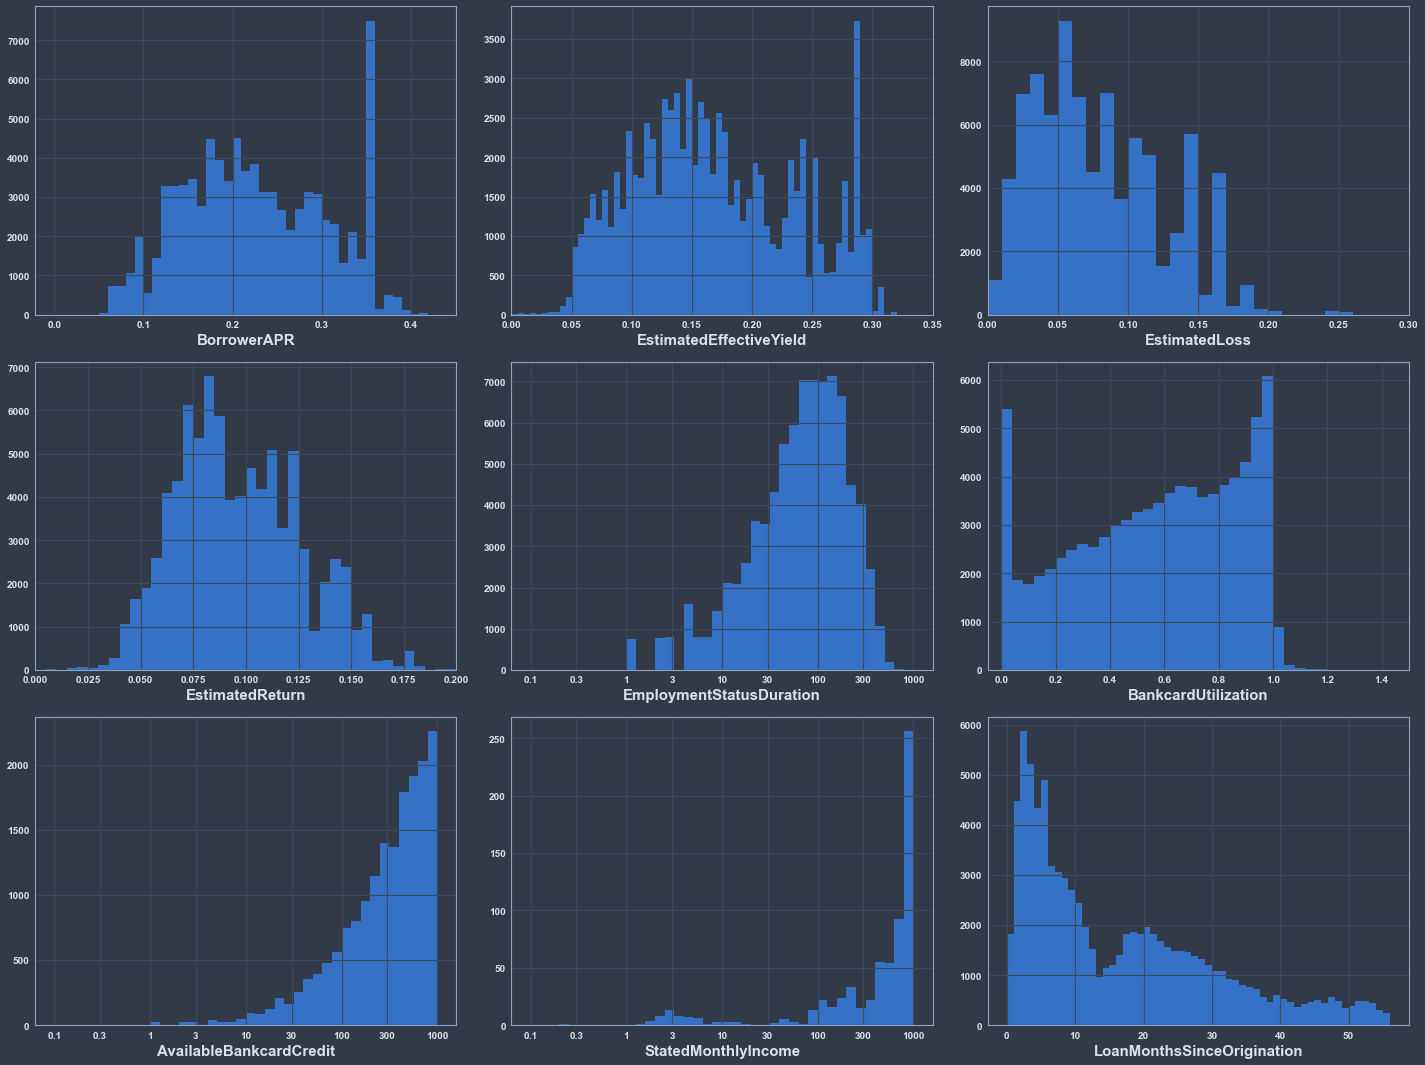

In [21]:
plt.figure(figsize = [20, 15]) 

plt.subplot(3, 3, 1) 
bins = np.arange(0, df_clean_num['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = df_clean_num, x = 'BorrowerAPR', bins = bins)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('BorrowerAPR',weight = 'bold',size=15);
 

plt.subplot(3, 3, 2) 
#bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
bins = np.arange(0, df_clean_num['EstimatedEffectiveYield'].max()+0.005, 0.005)
plt.hist(data = df_clean_num, x = 'EstimatedEffectiveYield', bins = bins)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EstimatedEffectiveYield',weight = 'bold',size=15);
plt.xlim(0,0.35)


plt.subplot(3, 3, 3) 
bins = np.arange(0, df_clean_num['EstimatedLoss'].max()+0.01, 0.01)
plt.hist(data = df_clean_num, x = 'EstimatedLoss', bins = bins)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EstimatedLoss',weight = 'bold',size=15);
plt.xlim(0,0.3) 


plt.subplot(3, 3, 4) 
bins = np.arange(0, df_clean_num['EstimatedReturn'].max()+0.005, 0.005)
plt.hist(data = df_clean_num, x = 'EstimatedReturn', bins = bins)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EstimatedReturn',weight = 'bold',size=15);
plt.xlim(0,0.2)


plt.subplot(3, 3, 5) 
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = df_clean_num, x = 'EmploymentStatusDuration', bins = bins)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks( ticks, labels,weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('EmploymentStatusDuration',weight = 'bold',size=15);



plt.subplot(3, 3, 6) 
bins = np.arange(0, df_clean_num['BankcardUtilization'].max()+0.04, 0.04)
plt.hist(data = df_clean_num, x = 'BankcardUtilization', bins = bins)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('BankcardUtilization',weight = 'bold',size=15);
plt.xlim(-0.05,1.5)


plt.subplot(3, 3, 7)
#b=np.percentile(df_clean_num['AvailableBankcardCredit'], 25)
#bins = np.arange(0, df_clean_num['AvailableBankcardCredit'].max()+b, b)
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = df_clean_num, x = 'AvailableBankcardCredit', bins = bins)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels,weight = 'bold',size = 10)
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('AvailableBankcardCredit',weight = 'bold',size=15);

plt.subplot(3, 3, 8)
#b=np.percentile(df_clean_num['StatedMonthlyIncome'], 25)
#bins = np.arange(0, df_cleanat the pairwise correlations present be_num['StatedMonthlyIncome'].max()+b, b)
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = df_clean_num, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels,weight = 'bold',size = 10)
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('StatedMonthlyIncome',weight = 'bold',size=15);
#plt.xlim(-20000,100000)

plt.subplot(3, 3, 9) 
bins = np.arange(0, df_clean_num['LoanMonthsSinceOrigination'].max()+1, 1)
plt.hist(data = df_clean_num, x = 'LoanMonthsSinceOrigination', bins = bins)
plt.xticks( weight = 'bold',size = 10) 
plt.yticks( weight = 'bold',size = 10)
plt.xlabel('LoanMonthsSinceOrigination',weight = 'bold',size=15);


plt.tight_layout()


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between \$500 and \$1000, and another just below \$5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

### Bivariate categorical using heatmap

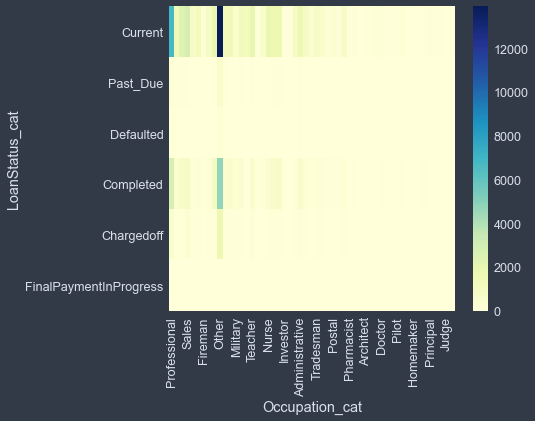

In [22]:
loanstatus_o = df_clean.groupby(['LoanStatus_cat', 'Occupation_cat']).size()
loanstatus_o = loanstatus_o.reset_index(name='count')
loanstatus_o = loanstatus_o.pivot(index = 'LoanStatus_cat', columns = 'Occupation_cat', values = 'count')
sb.heatmap(loanstatus_o,cmap="YlGnBu");

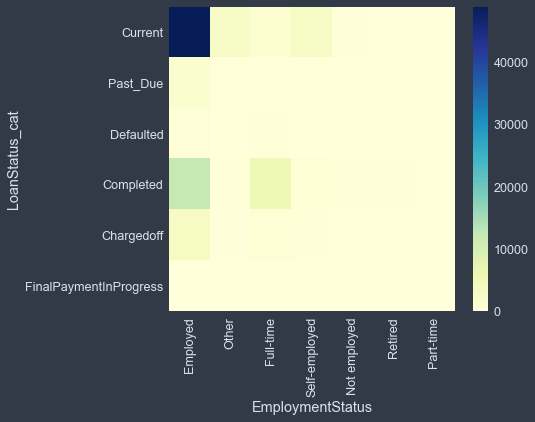

In [23]:
loanstatus_e = df_clean.groupby(['LoanStatus_cat', 'EmploymentStatus']).size()
loanstatus_e = loanstatus_e.reset_index(name='count')
loanstatus_e = loanstatus_e.pivot(index = 'LoanStatus_cat', columns = 'EmploymentStatus', values = 'count')
sb.heatmap(loanstatus_e,cmap="YlGnBu");

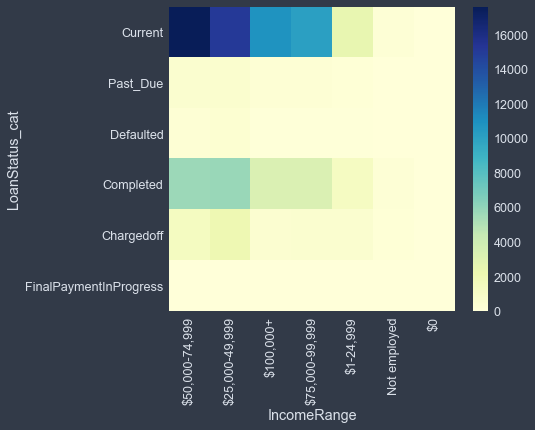

In [24]:
loanstatus_i = df_clean.groupby(['LoanStatus_cat', 'IncomeRange']).size()
loanstatus_i = loanstatus_i.reset_index(name='count')
loanstatus_i = loanstatus_i.pivot(index = 'LoanStatus_cat', columns = 'IncomeRange', values = 'count')
sb.heatmap(loanstatus_i,cmap="YlGnBu");


### Bivariate numerical and categorical

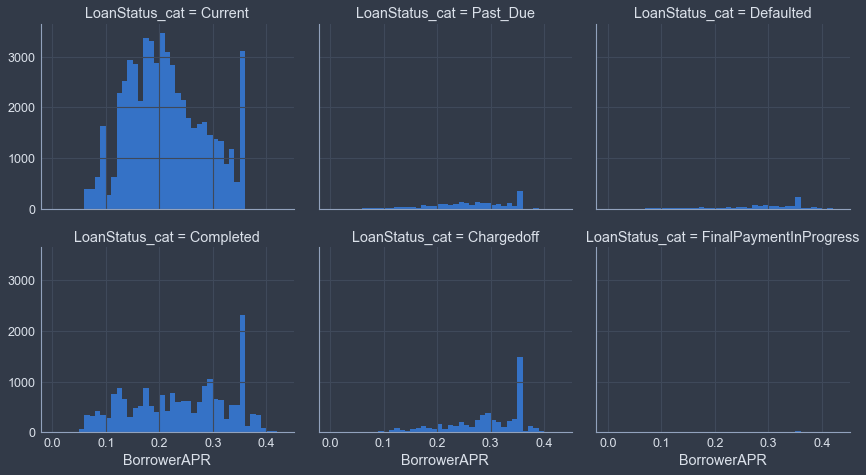

In [25]:
bins_edges = np.arange(0, df_clean_num['BorrowerAPR'].max()+0.01, 0.01)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'BorrowerAPR',bins = bins_edges);

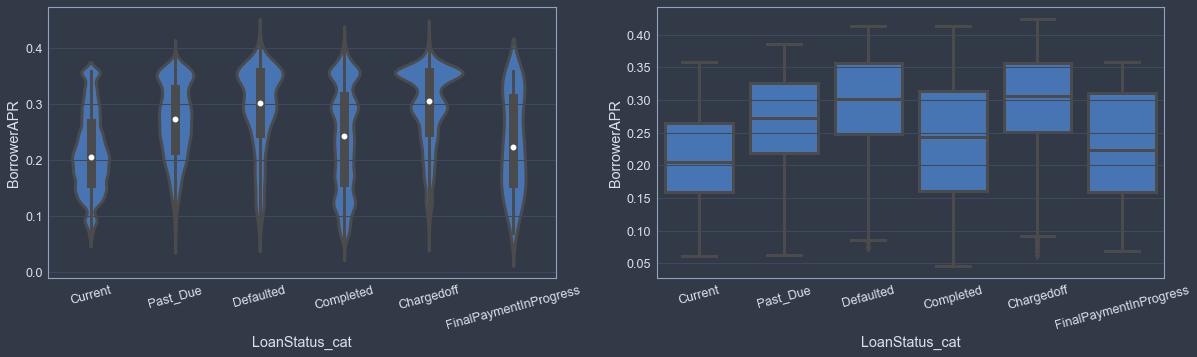

In [26]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.violinplot(data=df_clean_num, x='LoanStatus_cat', y='BorrowerAPR', color=base_color, innner=None,linewidth=3)
plt.xticks(rotation=15);

plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean_num, x='LoanStatus_cat', y='BorrowerAPR', color = base_color,linewidth=3)

plt.xticks(rotation = 15);

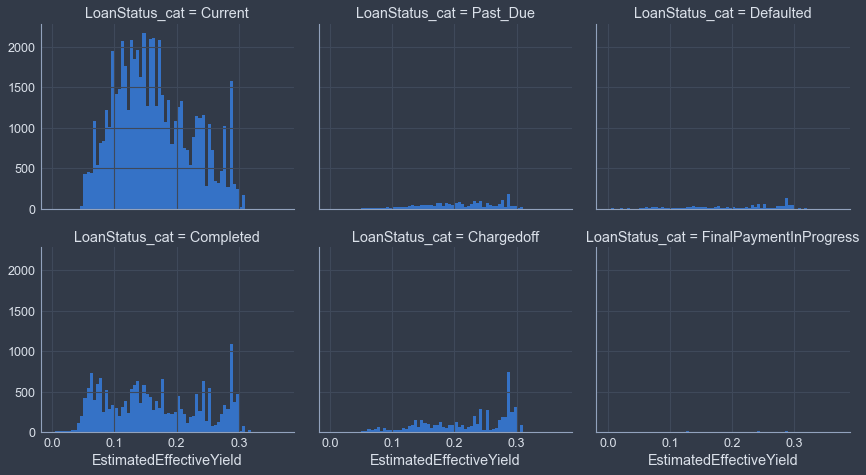

In [27]:
bins_edges = np.arange(0, df_clean_num['EstimatedLoss'].max()+0.005, 0.005)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'EstimatedEffectiveYield',bins = bins_edges);

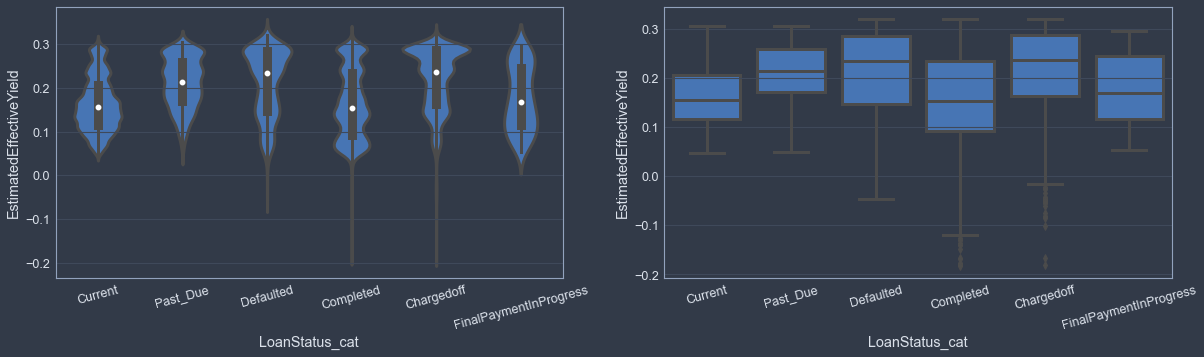

In [28]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.violinplot(data=df_clean_num, x='LoanStatus_cat', y='EstimatedEffectiveYield', color=base_color, innner=None,linewidth=3)
plt.xticks(rotation=15);

plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean_num, x='LoanStatus_cat', y='EstimatedEffectiveYield', color = base_color,linewidth=3)
plt.xticks(rotation = 15);

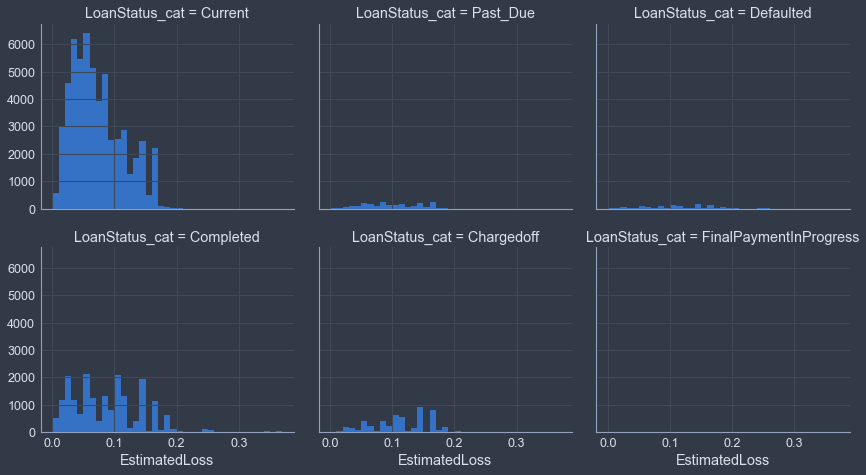

In [29]:
bins_edges = np.arange(0, df_clean_num['EstimatedLoss'].max()+0.01, 0.01)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'EstimatedLoss',bins = bins_edges);

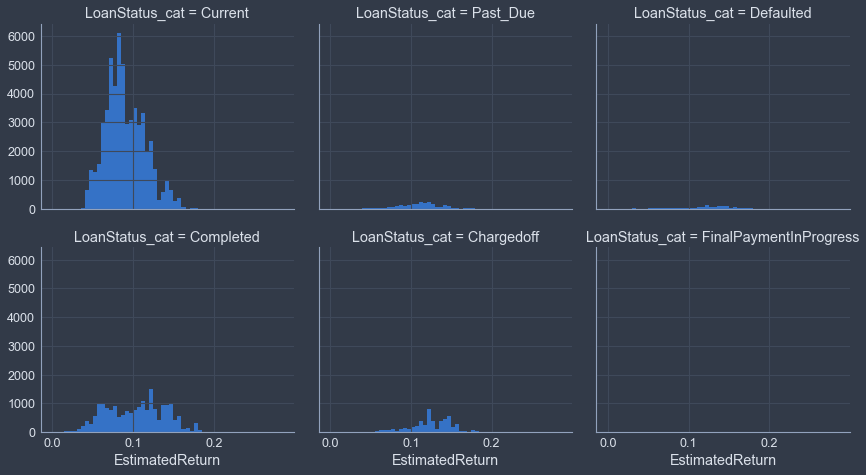

In [30]:
bins_edges = np.arange(0, df_clean_num['EstimatedReturn'].max()+0.005, 0.005)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'EstimatedReturn',bins = bins_edges);

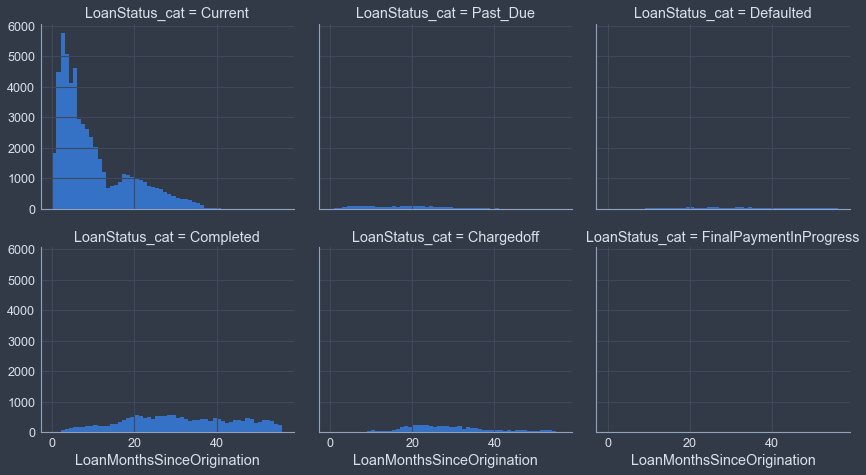

In [31]:
bins_edges = np.arange(0, df_clean_num['LoanMonthsSinceOrigination'].max()+1, 1)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'LoanMonthsSinceOrigination',bins = bins_edges);

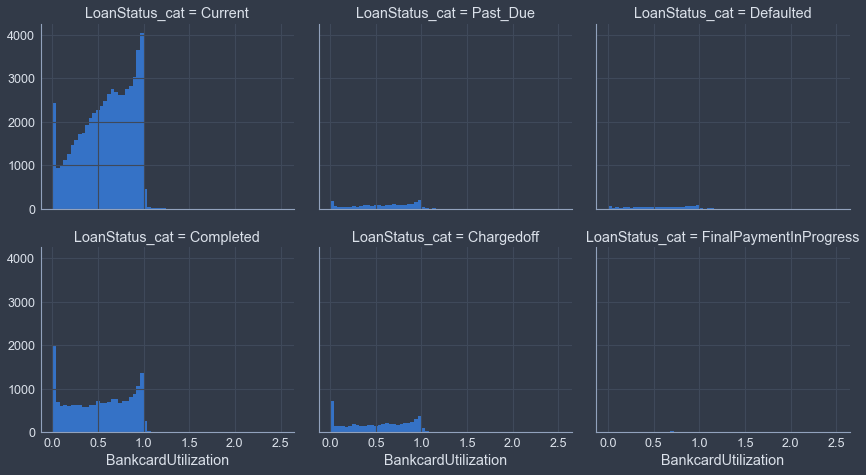

In [32]:
bins_edges = np.arange(0, df_clean_num['BankcardUtilization'].max()+0.04, 0.04)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'BankcardUtilization',bins = bins_edges);


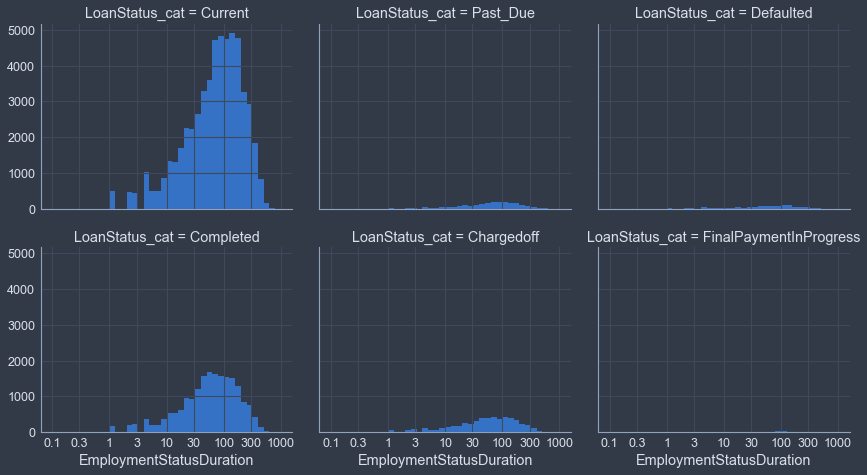

In [33]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'EmploymentStatusDuration', bins = bins);
ticks =  [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);

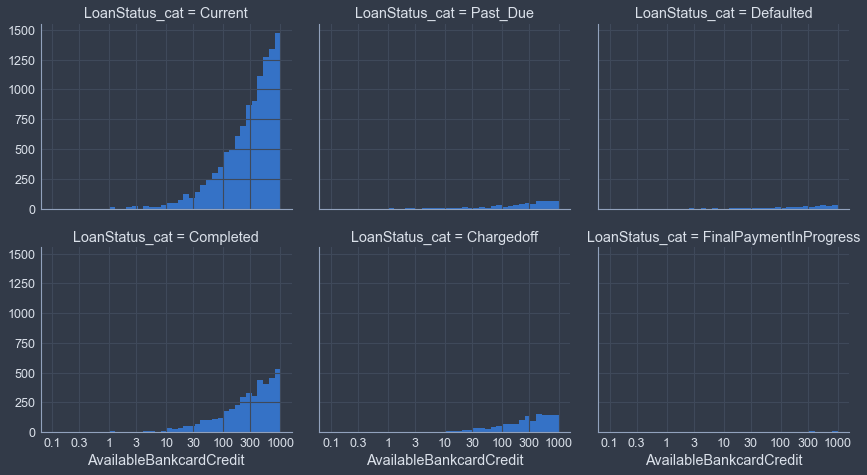

In [34]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat',height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'AvailableBankcardCredit', bins = bins);
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks,labels)
plt.tight_layout();

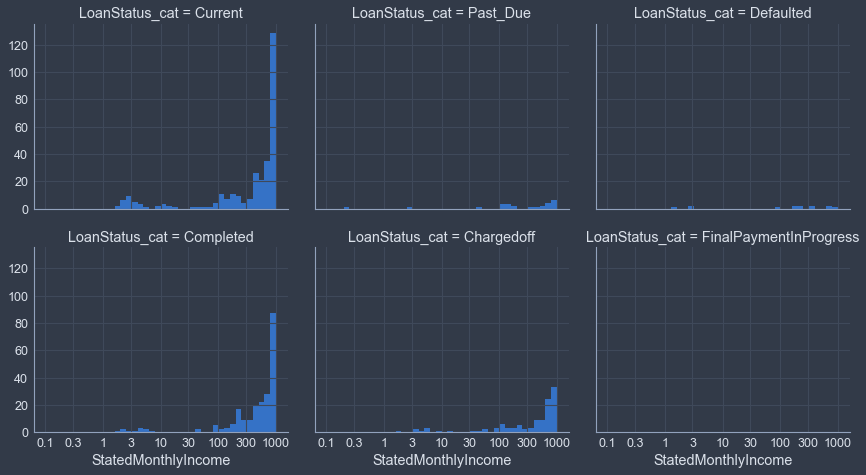

In [35]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
g = sb.FacetGrid(data = df_clean_num, col = 'LoanStatus_cat', height=3.4, aspect=1.2,col_wrap=3)
g.map(plt.hist, 'StatedMonthlyIncome', bins = bins);
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels);

## Multivariate analysis

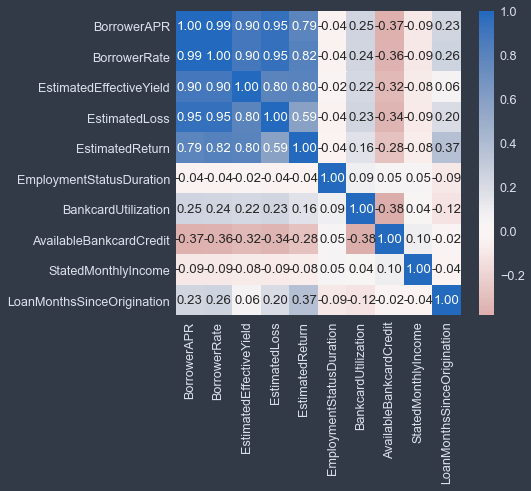

In [36]:
sb.heatmap(df_clean_num.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);


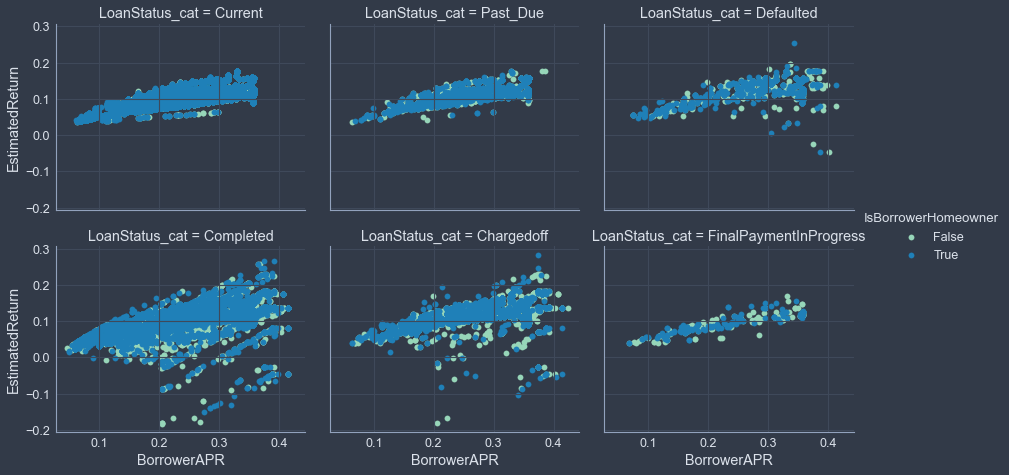

In [37]:
g = sb.FacetGrid(data = df_clean, col = 'LoanStatus_cat', hue = 'IsBorrowerHomeowner', height=3.4, aspect=1.2,
                margin_titles = True,palette="YlGnBu",col_wrap=3)
g.map(plt.scatter, 'BorrowerAPR', 'EstimatedReturn')
g.add_legend();

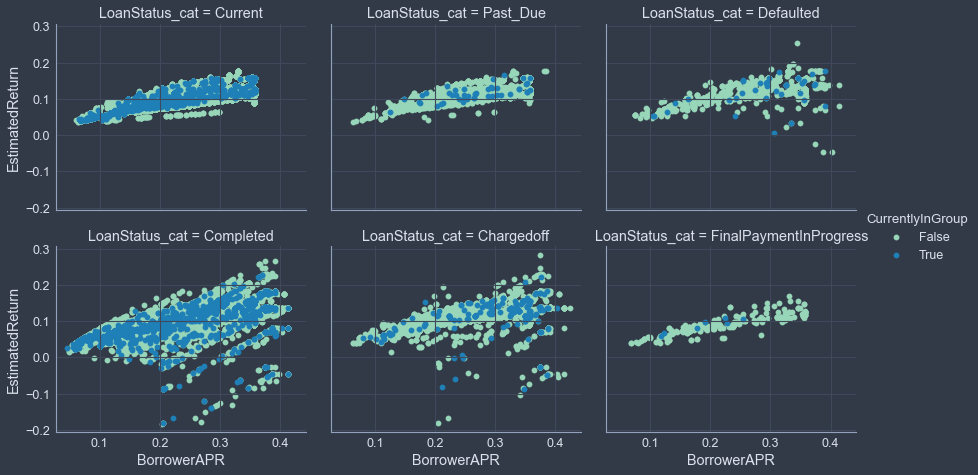

In [38]:
g = sb.FacetGrid(data = df_clean, col = 'LoanStatus_cat', hue = 'CurrentlyInGroup', height=3.4, aspect=1.2,
                margin_titles = True,palette="YlGnBu",col_wrap=3)
g.map(plt.scatter, 'BorrowerAPR', 'EstimatedReturn')
g.add_legend();